In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\gaomi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
performance=pd.read_csv("performance_table.csv",index_col=0)
performance.head()

,stock_id,time_id,LR_SMAPE,RF_SMAPE,LGB_SMAPE,GARCH_SMAPE,ARIMA_SMAPE,LAB4A_SMAPE
0,0,5,12.899735,10.540688,11.514050,11.147702,57.032624,6.866406
1,0,11,33.654015,69.384723,49.614546,85.959453,111.912892,108.765566
2,0,16,99.144909,81.522299,84.873387,144.025408,141.777733,121.341817
3,0,31,29.962603,27.836634,11.254558,8.677742,137.578063,38.124461
4,0,62,56.485850,69.431754,73.779680,28.177509,46.936511,86.807178


In [3]:
performance.mean()

stock_id          62.442409
time_id        16039.210567
LR_SMAPE          29.708473
RF_SMAPE          29.248490
LGB_SMAPE         29.288335
GARCH_SMAPE       33.189618
ARIMA_SMAPE       58.434181
LAB4A_SMAPE       36.976449
dtype: float64

In [13]:
performance['Best_Model'] = performance.loc[:, 'LR_SMAPE':'LAB4A_SMAPE'].idxmin(axis=1)
performance['Best_Model'] = performance['Best_Model'].str.replace('_SMAPE', '')
performance

,stock_id,time_id,LR_SMAPE,RF_SMAPE,LGB_SMAPE,GARCH_SMAPE,ARIMA_SMAPE,LAB4A_SMAPE,Best_Model
0,0,5,12.899735,10.540688,11.514050,11.147702,57.032624,6.866406,LAB4A
1,0,11,33.654015,69.384723,49.614546,85.959453,111.912892,108.765566,LR
2,0,16,99.144909,81.522299,84.873387,144.025408,141.777733,121.341817,RF
3,0,31,29.962603,27.836634,11.254558,8.677742,137.578063,38.124461,GARCH
4,0,62,56.485850,69.431754,73.779680,28.177509,46.936511,86.807178,GARCH
...,...,...,...,...,...,...,...,...,...
428680,126,32751,13.276665,16.497378,31.984591,9.998040,49.672478,42.496079,GARCH
428681,126,32753,83.111193,82.895903,93.236932,22.980743,66.598897,71.864759,GARCH
428682,126,32758,1.666130,1.806531,46.089555,42.947001,200.000000,83.107360,LR
428683,126,32763,58.089380,46.223397,51.152453,57.281968,58.231517,58.469013,RF


In [14]:
stock_performance=performance.groupby(["stock_id"])[["LR_SMAPE","RF_SMAPE","LGB_SMAPE","ARIMA_SMAPE","LAB4A_SMAPE"]].mean()
stock_performance

,LR_SMAPE,RF_SMAPE,LGB_SMAPE,ARIMA_SMAPE,LAB4A_SMAPE
stock_id,,,,,
0,42.510543,40.867946,41.081052,85.955402,50.278600
1,26.993506,26.643931,26.744531,53.212494,33.375110
2,23.448488,21.919069,22.059832,41.702451,27.368094
3,29.658780,29.708639,29.720070,60.247337,37.266999
4,38.175367,37.341712,37.373744,77.698381,46.757554
...,...,...,...,...,...
122,26.954896,25.905665,25.967926,51.597763,32.606083
123,21.815242,21.250467,21.358957,39.979068,27.359893
124,16.733280,16.898776,16.965684,30.691996,22.222687


In [15]:
stock_performance['Best_Model'] = stock_performance.loc[:, 'LR_SMAPE':'LAB4A_SMAPE'].idxmin(axis=1)
stock_performance['Best_Model'] = stock_performance['Best_Model'].str.replace('_SMAPE', '')
stock_performance

,LR_SMAPE,RF_SMAPE,LGB_SMAPE,ARIMA_SMAPE,LAB4A_SMAPE,Best_Model
stock_id,,,,,,
0,42.510543,40.867946,41.081052,85.955402,50.278600,RF
1,26.993506,26.643931,26.744531,53.212494,33.375110,RF
2,23.448488,21.919069,22.059832,41.702451,27.368094,RF
3,29.658780,29.708639,29.720070,60.247337,37.266999,LR
4,38.175367,37.341712,37.373744,77.698381,46.757554,RF
...,...,...,...,...,...,...
122,26.954896,25.905665,25.967926,51.597763,32.606083,RF
123,21.815242,21.250467,21.358957,39.979068,27.359893,RF
124,16.733280,16.898776,16.965684,30.691996,22.222687,LR


In [29]:
dic={"LR":"Linear Regression with PCA","RF":"Random Forest","LGB":"Light GBM","LAB4A":"Baseline Solution","GARCH":"GARCH","ARIMA":"ARIMA"}

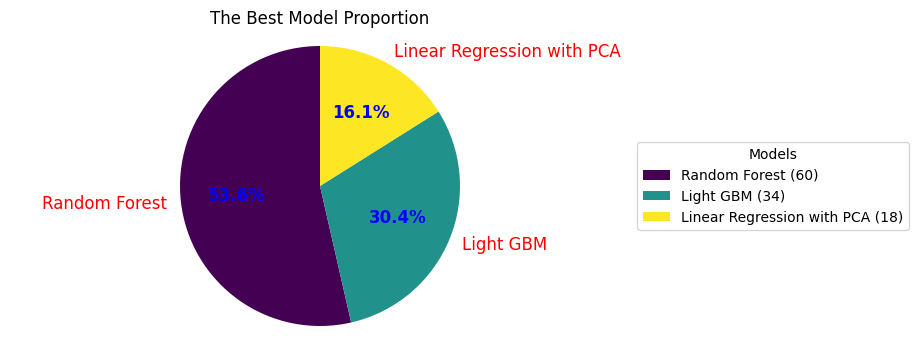

In [23]:
import matplotlib.pyplot as plt

# Assuming 'performance' is your DataFrame and it contains the 'Best_Model' column
model_counts = stock_performance['Best_Model'].value_counts()

# Set up the color palette using a matplotlib colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(model_counts)))

# Create the pie chart
plt.figure(figsize=(8, 4))
wedges, texts, autotexts = plt.pie(model_counts, 
                                   labels=[dic[ind]for ind in model_counts.index], 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=colors,
                                  textprops={'color': 'r', 'size': 12})

# Beautify with a legend
plt.legend(wedges, [f'{dic[i]} ({v})' for i, v in zip(model_counts.index, model_counts)],
           title="Models",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('The Best Model Proportion Across Stock')  # Add a title to the chart
plt.setp(autotexts, size=12, weight="bold",color="blue")  # Set properties for autotexts

plt.show()


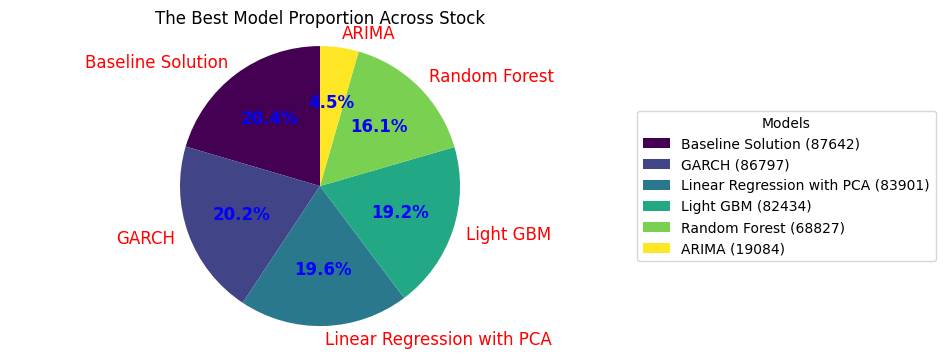

In [30]:
import matplotlib.pyplot as plt

# Assuming 'performance' is your DataFrame and it contains the 'Best_Model' column
model_counts = performance['Best_Model'].value_counts()

# Set up the color palette using a matplotlib colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(model_counts)))

# Create the pie chart
plt.figure(figsize=(8, 4))
wedges, texts, autotexts = plt.pie(model_counts, 
                                   labels=[dic[ind]for ind in model_counts.index], 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=colors,
                                  textprops={'color': 'r', 'size': 12})

# Beautify with a legend
plt.legend(wedges, [f'{dic[i]} ({v})' for i, v in zip(model_counts.index, model_counts)],
           title="Models",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('The Best Model Proportion Across Stock')  # Add a title to the chart
plt.setp(autotexts, size=12, weight="bold",color="blue")  # Set properties for autotexts

plt.show()
